# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [110]:
# builtin
import os, sys, time, random


# data
import pandas as pd
import numpy as np


# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import spacy


# ML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import TruncatedSVD , PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


# parallelisation
from pandarallel import pandarallel

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.3 prerequies and options

In [201]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/alex/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# init sns

sns.set()

In [ ]:
# init pandarallel

pandarallel.initialize()

## 1.4 Loading data

In [202]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv']

In [203]:
# load dataframe

fn = data + 'df.csv'
df = pd.read_csv(fn)

In [206]:
df.head(2)

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38


# 2. Explore corpus and documents

##  2.1 20 random documents 

In [208]:
df_samp = df.sample(20)
df_samp

,text,target,_len_txt
1671,http://t.co/QQC0gKbEGs efs300: http://t.co/ZSt...,0,117
5744,@teamVODG Discovered by @NickCannon \n Listen/...,0,134
2402,Happy no one was hurt when #wmata train derail...,1,139
6178,'I know a dill pickle when I taste one' -me,0,43
5926,@CortezEra I dead ass screamed when we signed ...,0,79
3900,@SeanPeconi @Jason_Floyd @LynchOnSports @crisc...,0,133
251,U.S National Park Services Tonto National Fore...,1,139
5034,@hazelannmac ooh now I feel guilty about wishi...,0,94
2454,Madhya Pradesh Train Derailment: Village Youth...,1,63
2220,Back on the beach after the deluge. Surf camp...,1,132


In [209]:
for idx, ser in df_samp.iterrows(): 

    txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
    print(txt_1+ser['text']+ "..." + "\n\n")

target : 0, len : 117
http://t.co/QQC0gKbEGs efs300: http://t.co/ZStuvsBQq0 'Star Wars' and 'Star Trek' Collide on Pluto Moon Charon #pluto...


target : 0, len : 134
@teamVODG Discovered by @NickCannon 
 Listen/Buy @realmandyrain #RIOT on @iTunesMusic @iTunes https://t.co/dehMym5lpk Û_ #BlowMandyUp...


target : 1, len : 139
Happy no one was hurt when #wmata train derailed. Also the express bus is so much better than metro rail http://t.co/7cEhNV3DKy @fox5newsdc...


target : 0, len : 43
'I know a dill pickle when I taste one' -me...


target : 0, len : 79
@CortezEra I dead ass screamed when we signed him I couldn't fucking believe it...


target : 0, len : 133
@SeanPeconi @Jason_Floyd @LynchOnSports @criscyborg I think the risk of losing and getting her nose flattened has a lot to do with it...


target : 1, len : 139
U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... https://t.co/sW1sBua3mN via @Change...


target : 0, len : 94
@

In [30]:
def print_sample(sub_df, n_samp=10) : 
    """print out n_samp documents from a corpus"""
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        txt_1 = f"target : {ser['target']}, len : {ser['_len_txt']}\n"
        print(txt_1+ser['text']+ "..." + "\n\n")

In [210]:
df_1 = df[df.target==1]
df_1.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [213]:
# print 10 docs of target == 1 

print_sample(df_1)

target : 1, len : 136
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterran... http://t.co/GEU4H46CsZ...


target : 1, len : 63
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives...


target : 1, len : 136
DTN Brazil: Experts in France begin examining airplane debris found on Reunion Island: French air accident exp... http://t.co/M9IG3WQ8Lq...


target : 1, len : 117
Tonight is being quite interesting... A few minutes ago the fire system went off and we had to evacuate the building....


target : 1, len : 128
@breakingnewslh @bree_mars watch cnn's the seventies terrorism episode. Iran has always hated the U.S. They want us obliterated....


target : 1, len : 141
#Arsonist arrested for setting many fires. WATCH tonightÛªs other #headlines: http://t.co/sqgogJ3S5r. #Nightbeat @VeronicaDLCruz #2MinuteMix...


target : 1, len : 137
Now on #ComDev #Asia: Radio stations in #Bangladesh broadcasting #programs ?to address the

In [212]:
# print 10 docs of target == 0

print_sample(df[df.target==0])

target : 0, len : 43
It's my senior year I just wanna go all out...


target : 0, len : 121
I want to see my @AustinPearcy22 so bad its not even funny. I will probably cry and drowned him in kisses when I do. ????...


target : 0, len : 131
@james_justus *returns her*

Relax. You know I always return her so no need to panic. I just gave her some of those corn flakes. :P...


target : 0, len : 120
See a virtual tour of one of our listings on 547 Fir St Cannon Beach OR listed by Dorrie Caruana. http://t.co/nF46PAYTvw...


target : 0, len : 119
#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/wvTPuRYx63 #prebreak #best...


target : 0, len : 144
I love The body shopÛªs bags??

#cutekitten #catsofinstagram #summerinsweden #katt #katterpÌ´instagram #dumle #dagensÛ_ http://t.co/p4ZFXdnbcH...


target : 0, len : 111
@batfanuk we enjoyed the show today. Great fun. The emergency non evacuation was interesting. Have a great run....


target : 0, len 

## 2.2 work on a specific document

In [214]:
# select a random document

doc = df.text.sample(1)
doc = doc.values[0]
doc

"What's cool is that teens are becoming what I like to call 'digital first responders' for their friends who need a little help or support !!"

In [215]:
# lower

doc = doc.lower()
doc

"what's cool is that teens are becoming what i like to call 'digital first responders' for their friends who need a little help or support !!"

In [221]:
# tokenize

tokens = word_tokenize(doc)
tokens

['what',
 "'s",
 'cool',
 'is',
 'that',
 'teens',
 'are',
 'becoming',
 'what',
 'i',
 'like',
 'to',
 'call',
 "'digital",
 'first',
 'responders',
 "'",
 'for',
 'their',
 'friends',
 'who',
 'need',
 'a',
 'little',
 'help',
 'or',
 'support',
 '!',
 '!']

In [219]:
len(tokens)

29

In [220]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
tokens

['what',
 "'",
 's',
 'cool',
 'is',
 'that',
 'teens',
 'are',
 'becoming',
 'what',
 'i',
 'like',
 'to',
 'call',
 "'",
 'digital',
 'first',
 'responders',
 "'",
 'for',
 'their',
 'friends',
 'who',
 'need',
 'a',
 'little',
 'help',
 'or',
 'support',
 '!!']

In [222]:
len(tokens)

29

In [43]:
# stop_words

stop_words = set(stopwords.words('english'))
print(stop_words)

{'being', 'she', 'where', 'more', 'shan', 'no', 'once', 'o', 'from', 'out', 'didn', 'himself', 'themselves', 'mightn', 'shouldn', 'be', 'i', "don't", 'how', 'll', 'ain', 'other', "you'd", 'while', 'just', 'until', 'then', 'do', 'now', 'am', 'because', 'nor', 'our', 'wouldn', 't', 'the', 'wasn', "you're", 'haven', 'me', 'with', 'ma', "hadn't", 'doing', "needn't", 'aren', 'you', 'have', 'them', 'yourselves', 'off', 'under', "won't", 'did', 'can', "hasn't", 'doesn', 'hadn', "that'll", 'y', 'it', "should've", 'needn', 'same', "shouldn't", 'isn', 're', 'by', 'this', "haven't", 'my', "mustn't", 'about', 'there', 'some', 'all', 'won', 'in', "weren't", 'against', 'very', "wouldn't", "you've", 'will', 'whom', "you'll", 'as', "aren't", "isn't", 'further', 'don', 'these', 'its', 'should', 'those', 'which', 'between', 'herself', "couldn't", 'if', 'not', 'or', 'own', 'an', 'and', 'during', 'too', 'yours', 'your', 'such', 'm', "mightn't", 'are', "it's", 'down', 'having', 'theirs', 'here', 'so', 'but

In [223]:
tokens = [w for w in tokens if w not in stop_words]
tokens

["'s",
 'cool',
 'teens',
 'becoming',
 'like',
 'call',
 "'digital",
 'first',
 'responders',
 "'",
 'friends',
 'need',
 'little',
 'help',
 'support',
 '!',
 '!']

In [224]:
len(tokens)

17

In [225]:
# an other tokensizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
tokens

['what',
 's',
 'cool',
 'is',
 'that',
 'teens',
 'are',
 'becoming',
 'what',
 'i',
 'like',
 'to',
 'call',
 'digital',
 'first',
 'responders',
 'for',
 'their',
 'friends',
 'who',
 'need',
 'a',
 'little',
 'help',
 'or',
 'support']

In [226]:
len(tokens)

26

In [227]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
tokens

['cool',
 'teens',
 'becoming',
 'like',
 'call',
 'digital',
 'first',
 'responders',
 'friends',
 'need',
 'little',
 'help',
 'support']

In [228]:
len(tokens)

13

In [229]:
def process_text_1(doc, rejoin=False) : 
    """basic function of text processing """
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [230]:
process_text_1(doc)

['cool',
 'teens',
 'becoming',
 'like',
 'call',
 'digital',
 'first',
 'responders',
 'friends',
 'need',
 'little',
 'help',
 'support']

## 2.3 working on corpus

In [253]:
# join all corpus

raw_corpus = "".join(df.text.values)
raw_corpus[:5000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [250]:
# process the corpus

corpus = process_text_1(raw_corpus)
corpus

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [240]:
len(set(corpus))

22486

In [234]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

co             4740
http           4263
https           408
amp             344
like            343
               ... 
appalling         1
businessmen       1
jlwhaowfqa        1
saveti            1
ymy4rskq3d        1
Length: 22486, dtype: int64

In [235]:
# visualization

# sns.barplot(x=tmp.index, y=tmp.values)

<AxesSubplot:>

Error in callback <function flush_figures at 0x7f4a44f53550> (for post_execute):


KeyboardInterrupt: 

In [237]:
# 30st most common tokens

tmp.head(30)

co           4740
http         4263
https         408
amp           344
like          343
û_            297
fire          234
get           226
via           219
2             204
people        194
new           183
one           181
news          167
disaster      148
emergency     146
video         138
would         135
body          127
police        123
still         121
3             120
burning       119
crash         117
u             117
us            115
storm         114
back          113
know          113
day           112
dtype: int64

In [238]:
# 30st last common tokens

tmp.tail(30)

sweated                1
drying                 1
gqpi7jmkan             1
sharethissouth         1
92                     1
88                     1
17000                  1
drrichardbesser        1
columbus               1
n8ezfctfcemichael      1
rowysolouisville       1
hxvfmouhdm             1
steveycheese99         1
mapmyrun               1
stung                  1
x6asgrjswcgot          1
transgender            1
mwlippert              1
southkorea             1
electrocutedboiling    1
waterfur               1
3a50dhz7yijust         1
50ft                   1
hairdryer              1
earths_voice           1
appalling              1
businessmen            1
jlwhaowfqa             1
saveti                 1
ymy4rskq3d             1
dtype: int64

In [241]:
tmp.describe()

count    22486.000000
mean         3.729343
std         43.687675
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4740.000000
dtype: float64

In [66]:
# sns.displot(tmp)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4a44f53550> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# sns.boxplot(tmp)

In [242]:
# unique words --> not usefull

list_unique_words = tmp[tmp==1]
list_unique_words[:30]

x9cuihib5nfinnish    1
creatures            1
nukes                1
ys3nmwwyvc           1
pact                 1
stunckle             1
alpotnb7q3japan      1
restart              1
navygermany          1
40mln                1
construct            1
willie_am_i          1
0dxvz7fdh3a          1
cataclysmic          1
gpvzv0249yus         1
e9d9lk5fdwnuclear    1
promised             1
sy2whxt0k5           1
frkodestuknavy       1
rt_america           1
xkurdr3yevnuclear    1
melts                1
subsd                1
indo                 1
xn09mx6sxy           1
businessus           1
d8awx2okke           1
justthebottle        1
sizewell             1
reator               1
dtype: int64

In [244]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['x9cuihib5nfinnish',
 'creatures',
 'nukes',
 'ys3nmwwyvc',
 'pact',
 'stunckle',
 'alpotnb7q3japan',
 'restart',
 'navygermany',
 '40mln',
 'construct',
 'willie_am_i',
 '0dxvz7fdh3a',
 'cataclysmic',
 'gpvzv0249yus',
 'e9d9lk5fdwnuclear',
 'promised',
 'sy2whxt0k5',
 'frkodestuknavy',
 'rt_america',
 'xkurdr3yevnuclear',
 'melts',
 'subsd',
 'indo',
 'xn09mx6sxy',
 'businessus',
 'd8awx2okke',
 'justthebottle',
 'sizewell',
 'reator']

In [246]:
# save it for later

tmp = pd.DataFrame({"unique_words" : list_unique_words})
tmp.to_csv("data/cleaned/unique_words.csv", index=False)

In [256]:
def process_text_2(doc, rejoin=False, list_unique_words=None, min_len_word=3) : 
    """cf process_text but with  list_unique_words and min_len_word"""
    
    # list_unique_words
    if not list_unique_words: 
        list_unique_words = []
        
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # classics stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # no unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # no more len words
    more_than_N =  [w for w in non_unique_tokens_list if len(w) >= min_len_word  ]
    
    # only alpha chars
    alpha_tokens = [w for w in more_than_N if w.isalpha()]
    
    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [257]:
pd.Series(corpus).sample(30)

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'allforest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canadaall',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'ruby',
 'alaska',
 'smoke',
 'wildfires',
 'pours',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'directions',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 'colorado',
 'springs',
 'areasi',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'streeti',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'farhaha',
 'south',
 'tampa',
 'getting',
 'flo

In [252]:
len(set(corpus))

22486

In [258]:
corpus = process_text_2(raw_corpus, list_unique_words=list_unique_words, rejoin=False)
pd.Series(corpus).sample(30)

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'fire',
 'near',
 'residents',
 'asked',
 'shelter',
 'place',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfires',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 'closed',
 'due',
 'lake',
 'county',
 'fire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'colorado',
 'springs',
 'top',
 'hill',
 'see',
 'fire',
 'woods',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'south',
 'tampa',
 'getting',
 'flooded',
 'hah',
 'wait',
 'second',
 'live',
 'south',
 'tampa',
 'gonna',
 'gonna',
 'flooding',
 'raining',
 'flooding',
 'florida',
 'tampa',
 'days',
 'lost',
 'count',
 'flood',
 'myanmar',
 '

In [259]:
len(set(corpus))

5766

In [261]:
def process_text_3(doc, rejoin=True, lemm_or_stemm = "stem", list_unique_words=None, min_len_word=3) : 
    """df v2 but with stemmer and lemmer"""
 
    # list_unique_words
    if not list_unique_words: 
        list_unique_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_unique_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [264]:
corpus = process_text_3(raw_corpus, rejoin=False, list_unique_words=list_unique_words)
pd.Series(corpus).sample(30)

['deed',
 'reason',
 'earthquak',
 'may',
 'allah',
 'forgiv',
 'fire',
 'near',
 'resid',
 'ask',
 'shelter',
 'place',
 'offic',
 'evacu',
 'shelter',
 'place',
 'order',
 'peopl',
 'receiv',
 'wildfir',
 'evacu',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfir',
 'school',
 'rockyfir',
 'updat',
 'california',
 'hwi',
 'close',
 'due',
 'lake',
 'counti',
 'fire',
 'wildfir',
 'flood',
 'disast',
 'heavi',
 'rain',
 'caus',
 'flash',
 'flood',
 'street',
 'colorado',
 'spring',
 'top',
 'hill',
 'see',
 'fire',
 'wood',
 'emerg',
 'evacu',
 'happen',
 'build',
 'across',
 'afraid',
 'tornado',
 'come',
 'area',
 'three',
 'peopl',
 'die',
 'heat',
 'wave',
 'south',
 'tampa',
 'get',
 'flood',
 'hah',
 'wait',
 'second',
 'live',
 'south',
 'tampa',
 'gonna',
 'gonna',
 'flood',
 'rain',
 'flood',
 'florida',
 'tampa',
 'day',
 'lost',
 'count',
 'flood',
 'myanmar',
 'arriv',
 'school',
 'bu',
 'multi',
 'car',
 'crash',
 'break',
 'man',
 'love',

In [274]:
len(set(corpus))

4472

In [277]:
pd.Series( words.words()).sample(30)

24306                boil
81075             guttide
186772    spinoperipheral
85305           heterosis
48166         Dactylopius
102465            Knesset
181844             Sinian
194957        supersocial
181847       Sinicization
210130          ubiquious
153779       prefraternal
14660            Assyroid
98033                 irk
145979      physiographic
95508            institor
102837        Kornephorus
137635             palled
223571       unsubsidiary
15840              aurure
36435          cinnamenyl
77119           Gibeonite
187799          spumiform
194825       superposable
228161             versor
60139            elastose
187314    Spondylocladium
203920          titubancy
95900          interbring
86162        histogenesis
111316       manufacturer
dtype: object

In [278]:
len(set( words.words()))

235892

In [279]:
eng_words = [i.lower() for i in words.words()]
eng_words

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'abassin',
 'abastardize',
 'abatable',
 'abate

In [281]:
len(set(eng_words))

234377

In [282]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
pd.Series(eng_words_stem).sample(30)

167798         resinoid
51231            depass
3179         aerobiolog
46250       cryptodoubl
11021            anywis
18568              bare
151253          portanc
219239        unmanipul
114163            merop
226545       vaccinogen
219708         unmurmur
189146            stele
109570    machinofactur
13810        arthrotomi
171637            rumbl
78525            godmak
160310         purparti
46659       cultrirostr
116749       miraculist
101836             khat
26278             brief
79935           gregari
155946        proattend
210651         umptieth
109877           madman
77333       gingivolabi
154877         presecur
73365          freehold
70213         firespout
42275        contravent
dtype: object

In [283]:
len(set(eng_words_stem))

178311

In [286]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
pd.Series(eng_words_lem).sample(30)

221212             unpursed
199409         telegraphone
115969          microzoaria
27514               bundeli
167465            repulsion
169259          rheotropism
90362         hyracotherian
175197            scirtopod
233866                 wyle
173885         satisfactory
3993                  agist
64564           erysipelous
216927            unfuddled
160242                pured
135671           overrusset
90250        hypothetically
132847       ostariophysial
58358               dullard
194138    superaccumulation
169219              rheebok
93196           incourteous
211624             unbating
199960           tenggerese
104570                laten
187828             spurling
57362            downcastly
101261               kasida
91454            imbricated
137373            palaverer
123421            neologize
dtype: object

In [287]:
len(eng_words_lem)

236736

In [289]:
def process_text_4(doc, rejoin=True, lemm_or_stemm = "stem", list_unique_words=None, min_len_word=3, eng_words=None) : 
    """df v3 but with only valid english word"""
 
    # list_unique_words
    if not list_unique_words: 
        list_unique_words = []
        
    # lower and strip
    doc = doc.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > N
    more_than_N =  [w for w in non_unique_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_N if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else :
        engl_text = trans_text
        
    #  return a list or a string
    if rejoin : 
        return " ".join(engl_text)
    
    return engl_text

In [ ]:
corpus = process_text_4(raw_corpus, rejoin=False, list_unique_words=list_unique_words, eng_words=eng_words_stem)
corpus

In [ ]:
len(set(corpus))

In [116]:
tf = TfidfVectorizer()
X = tf.fit_transform(df.clean_text)
X

<7613x5176 sparse matrix of type '<class 'numpy.float64'>'
	with 53222 stored elements in Compressed Sparse Row format>

In [117]:
X = X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
tf.get_feature_names_out()

array(['aannnnd', 'aashiqui', 'abandon', ..., 'ûïwe', 'ûïwhen', 'ûïyou'],
      dtype=object)

In [119]:
X = pd.DataFrame(X, columns=tf.get_feature_names_out())
X

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,...,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
len(tf.get_feature_names_out())

5176

In [121]:
X

,aannnnd,aashiqui,abandon,abbott,abbruchsimul,abbswinston,abcnew,abia,abil,abl,...,ûªll,ûªre,ûªve,ûïhatchet,ûïrichmond,ûïstretcher,ûïthe,ûïwe,ûïwhen,ûïyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
pca = PCA()
X_pca = pca.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
pca.explained_variance_ratio_

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
len(cumsum)

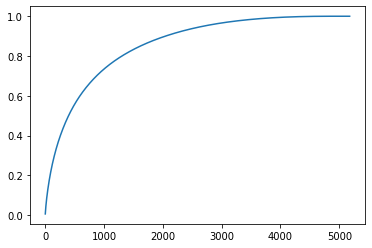

In [95]:
plt.plot(range(1, len(cumsum)+1), cumsum)

In [98]:
X_pca = X_pca[:, :1000]

In [99]:
X_pca.shape

(7613, 800)

In [100]:
X_train = pd.DataFrame(X_pca)
y_train = df.target

In [101]:
estimator = RandomForestClassifier()
param_grid = {}
cv = 10

In [102]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [103]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

In [104]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,35.213131,6.852969,0.05958,0.017401,{},0.663606,0.056981,1


In [108]:
grid.best_estimator_.feature_importances_

array([0.02379448, 0.01234724, 0.01208949, 0.01117866, 0.00575285,
       0.00377014, 0.00834019, 0.00669237, 0.00344477, 0.00511978,
       0.00514736, 0.00655219, 0.00843549, 0.00607813, 0.00928024,
       0.00328269, 0.00864676, 0.00359412, 0.0026001 , 0.00944199,
       0.00375315, 0.00338615, 0.00497267, 0.00312458, 0.00153848,
       0.00422666, 0.00251376, 0.00218614, 0.00377581, 0.00234324,
       0.00520651, 0.00895808, 0.00638379, 0.00254707, 0.00188703,
       0.00214653, 0.00232387, 0.00227413, 0.00189748, 0.00204271,
       0.00205656, 0.00233125, 0.00365237, 0.00154602, 0.00259134,
       0.00203319, 0.00285599, 0.00211586, 0.00137684, 0.00158442,
       0.00139294, 0.00146806, 0.00156453, 0.00182169, 0.00156485,
       0.00279874, 0.00145937, 0.00139082, 0.00298577, 0.00154941,
       0.00170014, 0.00211355, 0.00167746, 0.00225797, 0.00141013,
       0.00169572, 0.00192799, 0.00164068, 0.00172518, 0.00127749,
       0.00143252, 0.00161596, 0.001802  , 0.00156463, 0.00236

In [128]:
tsd = TruncatedSVD(n_components=100)
X_tsd = tsd.fit_transform(X)

In [130]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_tsd, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [131]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,9.38733,1.050091,0.051955,0.020975,{},0.678056,0.062579,1


In [135]:

en_list = words.words()
pd.Series(en_list).sample(30)


202900        thwackingli
29757             canoodl
144981            phonism
70595           flambeaux
215810          unentangl
100236             johnin
116937         miscarriag
124128            nevadan
93913           ineffectu
210384           ultragas
73799     frontomaxillari
101340             katmon
167695             resett
232755               wiro
165901            regreen
184695        soliloquium
193166             succin
179628             shaman
81077           guttifera
230414            wappato
129344             obviat
163587              raven
126246          nonfluctu
22123              bifurc
169879               rifl
49226          decadianom
73935               fruit
126790          nonoutrag
58694                duti
65344             euchrom
dtype: object

In [136]:
en_list = words.words()
pd.Series(en_list).sample(30)


en_list = [i.lower() for i in en_list]

ps = PorterStemmer()

en_list = [ps.stem(i) for i in en_list]
pd.Series(en_list).sample(30)

78656          golfdom
180058       shellshak
69119           ferial
170712        romishli
215227        undisput
174305          scalen
27005             buba
145338      photolitho
122735          nauger
229973         waddent
143198           peror
131829     orchestiida
9667        anthribida
139510          pariet
158879    pseudopercul
90549          iceland
68694         fearless
182137           sisal
200892        tetrasem
79033           gospel
43716        cosmorama
230449        wardhold
187694        sprighti
52025           despot
217684      unhopingli
130904       onkilonit
73276           frator
12233       arachnolog
15461           attest
1892          acrospor
dtype: object

In [137]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word >= 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) >= 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
        
    # in english 
    en_text = [i for i in trans_text if i in en_list]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [138]:
df["clean_text"] = df.text.apply(lambda i :process_text(i) )

In [141]:
tf = TfidfVectorizer()
X = tf.fit_transform(df.clean_text)
# X = X.toarray()

In [142]:
X

<7613x5574 sparse matrix of type '<class 'numpy.float64'>'
	with 59247 stored elements in Compressed Sparse Row format>

In [143]:
tsd = TruncatedSVD(n_components=300)
X_tsd = tsd.fit_transform(X)

In [144]:
grid = GridSearchCV(estimator, param_grid, cv=cv, n_jobs=-1)
grid.fit(X_tsd, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={})

In [145]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score
0,19.653513,3.774193,0.040472,0.009187,{},0.694212,0.054654,1


In [166]:
pipe = Pipeline([
    ("reduction", TruncatedSVD()), 
    ("estimator", RandomForestClassifier()),
     ])

In [167]:
scaler_list = [StandardScaler()]

In [194]:
n_components = np.linspace(2, 300, 30).astype(int)

In [195]:
param_grid = {# "scaler" : [scaler_list], 
              "reduction" : [TruncatedSVD()], 
              "estimator" : [RandomForestClassifier()], 
                "reduction__n_components": n_components
             }

In [196]:
X.shape

(7613, 5574)

In [197]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True, verbose=3)
grid.fit(X, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=2;, score=(train=0.986, test=0.595) total time=   1.3s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=3;, score=(train=0.986, test=0.650) total time=   1.3s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=6;, score=(train=0.985, test=0.630) total time=   1.9s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=8;, score=(train=0.984, test=0.762) total time=   1.8s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=11;, score=(train=0.986, test=0.664) total time=   4.0s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=15;, score=(train=0.984, test=0.687) total time=   4.4s
[CV 4/5] END

[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=3;, score=(train=0.984, test=0.632) total time=   1.3s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=3;, score=(train=0.984, test=0.671) total time=   1.3s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=6;, score=(train=0.986, test=0.648) total time=   1.8s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=10;, score=(train=0.984, test=0.687) total time=   2.8s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=11;, score=(train=0.986, test=0.661) total time=   4.1s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=15;, score=(train=0.985, test=0.689) total time=   4.2s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD()

[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=2;, score=(train=0.986, test=0.597) total time=   1.4s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=5;, score=(train=0.986, test=0.638) total time=   1.9s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=8;, score=(train=0.986, test=0.664) total time=   1.8s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=10;, score=(train=0.984, test=0.760) total time=   3.1s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=13;, score=(train=0.986, test=0.674) total time=   4.1s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=15;, score=(train=0.986, test=0.671) total time=   4.2s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD()

[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=2;, score=(train=0.984, test=0.592) total time=   1.4s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=5;, score=(train=0.985, test=0.613) total time=   1.8s
[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=6;, score=(train=0.986, test=0.651) total time=   1.9s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=10;, score=(train=0.986, test=0.666) total time=   3.2s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=13;, score=(train=0.984, test=0.664) total time=   4.3s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=16;, score=(train=0.984, test=0.695) total time=   5.6s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD()

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduction', TruncatedSVD()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'reduction': [TruncatedSVD(n_components=53)],
                         'reduction__n_components': array([  2,  12,  22,  32,  43,  53,  63,  73,  84,  94, 104, 115, 125,
       135, 145, 156, 166, 176, 186, 197, 207, 217, 228, 238, 248, 258,
       269, 279, 289, 300])},
             return_train_score=True, verbose=3)

In [198]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i ]
res = res[cols]
res.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reduction,param_reduction__n_components,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
5,8.825195,0.848305,0.092432,0.021788,RandomForestClassifier(),TruncatedSVD(n_components=53),53,"{'estimator': RandomForestClassifier(), 'reduc...",0.711552,0.036472,1,0.985026,0.000948
8,11.530796,0.178485,0.072909,0.001007,RandomForestClassifier(),TruncatedSVD(n_components=53),84,"{'estimator': RandomForestClassifier(), 'reduc...",0.710108,0.036734,2,0.985157,0.000966
12,14.457499,0.244132,0.076468,0.004440,RandomForestClassifier(),TruncatedSVD(n_components=53),125,"{'estimator': RandomForestClassifier(), 'reduc...",0.709711,0.030591,3,0.985255,0.001004
7,10.892773,0.439182,0.083808,0.018343,RandomForestClassifier(),TruncatedSVD(n_components=53),73,"{'estimator': RandomForestClassifier(), 'reduc...",0.707874,0.037573,4,0.985157,0.000966
3,4.100113,0.149395,0.051056,0.009966,RandomForestClassifier(),TruncatedSVD(n_components=53),32,"{'estimator': RandomForestClassifier(), 'reduc...",0.706559,0.034706,5,0.985026,0.001009
6,10.362798,0.386309,0.076459,0.008785,RandomForestClassifier(),TruncatedSVD(n_components=53),63,"{'estimator': RandomForestClassifier(), 'reduc...",0.705509,0.034812,6,0.985058,0.000990
11,13.115279,0.218955,0.074908,0.001864,RandomForestClassifier(),TruncatedSVD(n_components=53),115,"{'estimator': RandomForestClassifier(), 'reduc...",0.705116,0.035286,7,0.985255,0.001004
10,12.842821,0.237048,0.081164,0.008381,RandomForestClassifier(),TruncatedSVD(n_components=53),104,"{'estimator': RandomForestClassifier(), 'reduc...",0.704720,0.032701,8,0.985288,0.000983
13,15.422194,0.462303,0.079268,0.006390,RandomForestClassifier(),TruncatedSVD(n_components=53),135,"{'estimator': RandomForestClassifier(), 'reduc...",0.704327,0.035640,9,0.985288,0.000983
15,17.034028,0.604707,0.078217,0.000993,RandomForestClassifier(),TruncatedSVD(n_components=53),156,"{'estimator': RandomForestClassifier(), 'reduc...",0.703933,0.035607,10,0.985288,0.000983


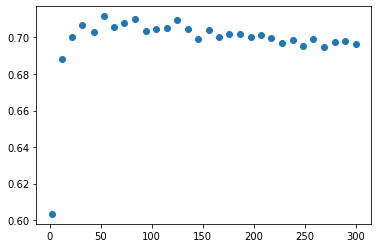

In [199]:
plt.scatter(res.param_reduction__n_components, res.mean_test_score)

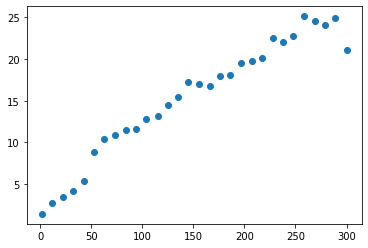

[CV 4/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=238;, score=(train=0.986, test=0.671) total time=  21.8s
[CV 2/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=258;, score=(train=0.985, test=0.684) total time=  24.5s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=269;, score=(train=0.984, test=0.755) total time=  24.5s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=289;, score=(train=0.987, test=0.679) total time=  25.5s
[CV 5/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=238;, score=(train=0.984, test=0.769) total time=  22.0s
[CV 3/5] END estimator=RandomForestClassifier(), reduction=TruncatedSVD(), reduction__n_components=258;, score=(train=0.987, test=0.685) total time=  25.8s
[CV 1/5] END estimator=RandomForestClassifier(), reduction=Trunc

In [200]:
plt.scatter(res.param_reduction__n_components, res.mean_fit_time)